In [41]:
# Imports
import matplotlib.pyplot as plt
import csv
import math
import numpy as np

In [42]:
### Define General Variables

In [43]:
# Define Constants
G_F = 1.663788*10**(-5) *10**(-18)   # GeV-2 to eV-2
Z = 30
sin_w = 0.231
T_0 = 0.241*10**(-3)  #eV
hbar = 6.582119569 * 10**(-22) * 10**(6)   #MeV*s to eV*s
c = 299792458 * 10**2   #m/s to cm/s

In [44]:
# Make Energy Array
energies = np.linspace(2.0 * 10**(6), 8.0* 10**(6), 25)

In [45]:
### Define Isotopes Dependent Variables

In [46]:
# Isotope 64
prob_64 = 0.486
N_64 = 34
M_64 = 59.550*10**9  #GeV to eV
xs_64 = []

In [47]:
# Isotope 66
prob_66 = 0.279
N_66 = 36
M_66 = 61.410*10**9  #GeV to eV
xs_66 = []

In [48]:
# Isotope 67
prob_67 = 0.041
N_67 = 37
M_67 = 62.342*10**9  #GeV to eV
xs_67 = []

In [49]:
# Isotope 68
prob_68 = 0.188
N_68 = 38
M_68 = 63.271*10**9  #GeV to eV
xs_68 = []

In [50]:
### Compute Cross Section for all Energies

In [51]:
# Create Cross Section Function
def XS(N, M, E):
    Q_W = N-(1-4*sin_w)*Z
    const_term = G_F**2 * Q_W**2 /(4*math.pi) * (hbar*c)**2 
    T_max = E/(1+M/(2*E))
    sigma = const_term * E**2 * (1-T_0/T_max)**2
    return sigma

In [52]:
# Calculate Isotope Cross Sections
for e in energies :
    xs_64.append(XS(N_64, M_64, e))
    xs_66.append(XS(N_66, M_66, e))
    xs_67.append(XS(N_67, M_67, e))
    xs_68.append(XS(N_68, M_68, e))

In [53]:
# Calculate Total Cross Section
xs_tot = []

for i in range(0,len(xs_64)) :
    tot = xs_64[i]*prob_64 + xs_66[i]*prob_66 + \
                     xs_67[i]*prob_67 + xs_68[i]*prob_68
    xs_tot.append(tot)

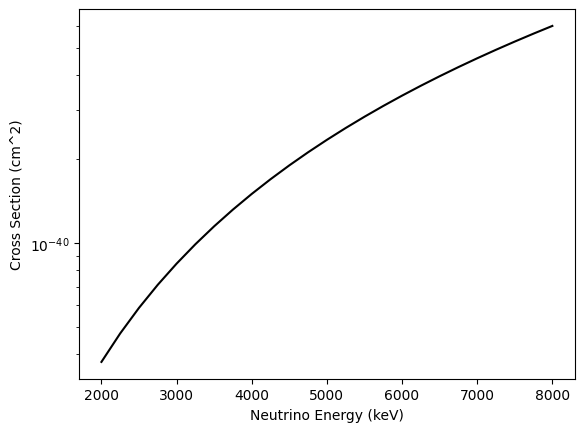

In [54]:
# Plot Results
kev = []
for e in energies :
    kev.append(e*10**(-3))
    
plt.plot(kev, xs_tot, color='black')
plt.xlabel('Neutrino Energy (keV)')
plt.ylabel('Cross Section (cm^2)')
plt.yscale('log')
plt.savefig('xs-reactor.png')

In [55]:
# Download Data
csv_file = 'cevns_xs_rx.csv'
with open(csv_file, 'w', newline='') as file:
    fieldnames = ['energy', 'xs']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(energies)) :
        writer.writerow({'energy': energies[i], 'xs': xs_tot[i]})